In constructor None
In setter async


<IPython.core.display.Javascript object>


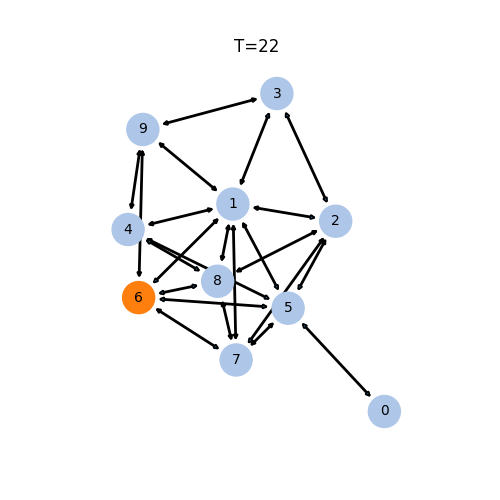

In [8]:
import sys; sys.path.insert(0, '../')
from PlexSim.Models.SIR import SIR
import networkx as nx, matplotlib.pyplot as plt,\
numpy as np
from matplotlib.patches import Circle, FancyArrowPatch
g = nx.random_graphs.erdos_renyi_graph(10, .5)
m = SIR(graph = g, \
        agentStates = [0, 1, 2],\
       mu = .01,\
       beta = .4,\
       updateType = 'sync')
# m.init_random(node = "0")
m.init_random()
N   = 50
res = np.ones((N + 1, m.nNodes))
res[0]  = m.states.base
res[1:] = m.simulate(N)

pos = nx.kamada_kawai_layout(m.graph)

%matplotlib notebook
fig, ax = plt.subplots(figsize = (5, 5))
patches = {}

stateMapper = {i : idx for \
               idx, i in enumerate(m.agentStates)}
colors = plt.cm.tab20(range(3))

for k, v in pos.items():
    idx = stateMapper[res[0, m.mapping[k]]]
    color = colors[idx]
    p = Circle(v, radius = .1,\
            label = k,\
            zorder = 2,\
            color = color)
    
    patches[k] = p
    ax.add_patch(p)
    ax.annotate(k, p.center, \
                horizontalalignment = 'center',\
                verticalalignment   = 'center',\
                zorder = 2)

for (u, v) in m.graph.edges():
    p1 = patches.get(u)
    p2 = patches.get(v)
    e  = FancyArrowPatch(p1.center, p2.center,\
                         patchA = p1, \
                         patchB = p2,\
#                          connectionstyle = 'arc3',\
                        mutation_scale = 5.0,\
                        arrowstyle = '<|-|>',\
                        lw = 2)
    ax.add_patch(e)


ax.axis('square')
ax.axis('off')
ax.autoscale()

fig.show()
def update(tidx):
    r = res[tidx]
    ax.set_title(f'T={tidx}')
    for idx, ri in enumerate(r):
        node = m.rmapping[idx]
        patches[node].set_color(colors[stateMapper[ri]])
    fig.canvas.flush_events()
    fig.canvas.draw()
    return patches.values()
from matplotlib.animation import FuncAnimation as fan
an = fan(fig, \
         update, frames = res.shape[0]-1,\
         interval = 50, \
        blit = 1)

In [9]:
from ipywidgets import HTML
HTML(an.to_html5_video())


HTML(value='<video width="500" height="500" controls autoplay loop>\n  <source type="video/mp4" src="data:vide…